## Observations and Insights 

In [ ]:
# Among the four treatment regimes, mice treated with Capomulin and Ramicane had significantly lower final tumor volumes than those treated with Infubinol and Ceftamin. The box and whisper chart reflects the following: The inner quartile range (iqr) for both Capomulin and Ramicane of final tumor volumes was close to 30-40 mm3, while the iqr for Infubinol and Ceftamin fell between 50-70 mm3 with both their means close to 60 mm3.
# As seen in the line graph - the average tumor volume over time dropped precipitously among the mice treated with Capomulin, going from ~45 mm3 to well under 10.
# According to the regression analysis, their is a strong positive correlation with average tumor volume and mouse weight among the mice treated with Capomulin. 

In [1]:
#%matplotlib notebook


In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'outer')


# Display the data table for preview
merged_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_number = len(merged_df["Mouse ID"].unique())
mice_number

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#time_point = merged_df["Timepoint"].value_counts()
#time_point


In [7]:
mouse_id = merged_df["Mouse ID"].value_counts()
mouse_id

g989    13
e227    10
i177    10
v991    10
a520    10
        ..
t573     1
n482     1
h428     1
f932     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [8]:
duplicate_mice_data = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_data

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 



In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merged_df.loc[merged_df["Mouse ID"] != "g989"]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
mice_number2 = len(clean_data_df["Mouse ID"].unique())
mice_number2

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_tumorvolume = clean_data_df.groupby("Drug Regimen").mean()
mean_tumorvolume = mean_tumorvolume["Tumor Volume (mm3)"]
mean_tumorvolume



Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
median_tumorvolume = clean_data_df.groupby("Drug Regimen").median()
median_tumorvolume = median_tumorvolume["Tumor Volume (mm3)"]
median_tumorvolume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [14]:
var_tumorvolume = clean_data_df.groupby("Drug Regimen").var()
var_tumorvolume = var_tumorvolume["Tumor Volume (mm3)"]
var_tumorvolume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [15]:
std_tumorvolume = clean_data_df.groupby("Drug Regimen").std()
std_tumorvolume = std_tumorvolume["Tumor Volume (mm3)"]
std_tumorvolume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [16]:
sem_tumorvolume = clean_data_df.groupby("Drug Regimen").sem()
sem_tumorvolume = sem_tumorvolume["Tumor Volume (mm3)"]
sem_tumorvolume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [19]:
summarytable_1 = pd.DataFrame({"Mean Tumor Volume" : mean_tumorvolume, "Median Tumor Volume" : median_tumorvolume, "Tumor Volume Variance":var_tumorvolume, "Std. Dev. of Tumor Volume" : std_tumorvolume, "SEM of Tumor Volume" : sem_tumorvolume})
summarytable_1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Std. Dev. of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summarytable2 = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median", "var", "std", "sem"]})
summarytable2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

num_regimen_measures1 = clean_data_df.groupby("Drug Regimen").count()
num_regimen_measures1 = num_regimen_measures1["Mouse ID"]
num_regimen_measures1


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

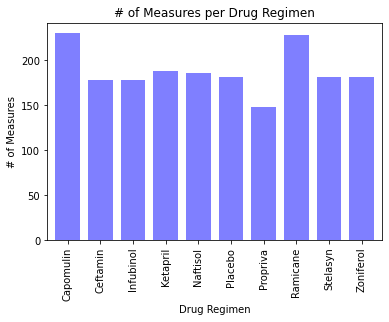

In [25]:
num_regimen_measures1.plot(kind='bar', color='b', alpha=.5, title="# of Measures per Drug Regimen", align = 'center', width=.75
    )
plt.ylabel("# of Measures")
plt.show()


In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
num_regimen_measures2 = clean_data_df.groupby("Drug Regimen").count()
num_regimen_measures2 = num_regimen_measures2["Mouse ID"]
num_regimen_measures2


#x_axis = num_regimen_measures2.index
#y_axis = num_regimen_measures2
#plt.bar(x_axis, y_axis, color='b', alpha=.5, align='center')



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

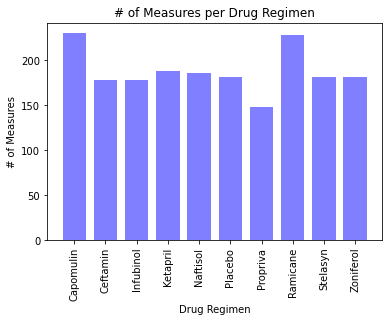

In [26]:
x_axis = num_regimen_measures2.index
y_axis = num_regimen_measures2
plt.bar(x_axis, y_axis, color='b', alpha=.5, align='center', width=.75)
plt.title("# of Measures per Drug Regimen")
plt.xticks(num_regimen_measures2.index, rotation = 'vertical')
plt.ylabel("# of Measures")

plt.xlabel("Drug Regimen")
plt.show()

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_female_pie = clean_data_df.groupby("Sex")
male_female_pie = male_female_pie.count()["Mouse ID"]
male_female_pie

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

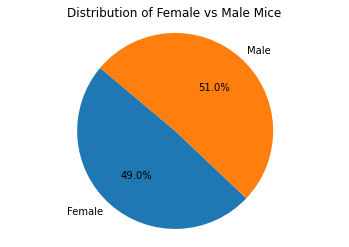

In [164]:
male_female_pie.plot(kind="pie", title="Distribution of Female vs Male Mice", autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.ylabel("")
plt.show()

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# male_female_pie.tolist()
count = male_female_pie.tolist()
count

[922, 958]

In [166]:
sex = male_female_pie.index.values.tolist()
sex

['Female', 'Male']

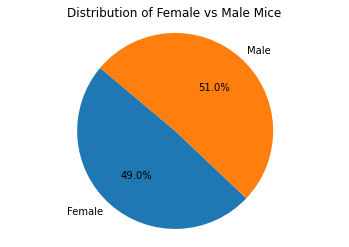

In [167]:
plt.pie(count, labels=sex, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
    # grab timepoint for each mouse

timepoints = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoints



Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [169]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
    # not dealing with four specific treatments yet in this or prior#

timepoints = timepoints.reset_index()
timepoints
    

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [170]:
merged_df2 = pd.merge(timepoints, clean_data_df, on=["Mouse ID", "Timepoint"], how = "left")
merged_df2

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [171]:
# Put treatments into a list for for loop (and later for plot labels)
    # put four treatments from above in list

treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
    #simply an empty list

tumorvol_list = []


    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    #overall goal
    #this is where to start for loop on list created above (four treatments). 
    
for regimen in treatments_list:

    #all the below inside for loop
    
# Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_volumes = merged_df2.loc[(merged_df2["Drug Regimen"] == regimen), ["Tumor Volume (mm3)"]]
    

    
# add subset 
    #whatever you got in the locate above, you're adding to your empty list
    
    tumorvol_list.append(tumor_volumes["Tumor Volume (mm3)"])
    
#tumorvol_list
    
# Determine outliers using upper and lower bounds
    # of subset above
    
    quartiles = tumor_volumes["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    low_bound = lower_quartile - (1.5*iqr)
    up_bound = upper_quartile + (1.5*iqr)
    outliers = tumor_volumes[(tumor_volumes["Tumor Volume (mm3)"] < low_bound) | (tumor_volumes["Tumor Volume (mm3)"] > up_bound)]
    print(f"{regimen}: {outliers}")

Capomulin: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ramicane: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Infubinol:     Tumor Volume (mm3)
31           36.321346
Ceftamin: Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


<ipython-input-172-0b5dddd7b30e>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatment_list)


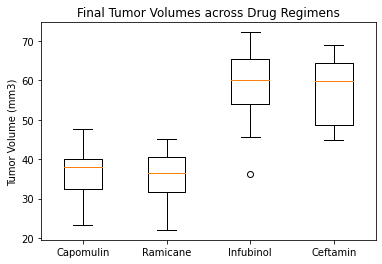

In [172]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volumes across Drug Regimens")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xticklabels(treatment_list)
ax.boxplot(tumorvol_list)
plt.show()


## Line and Scatter Plots

In [183]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin")]
capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [185]:
mouse_id = "s185"
cap_mouse = capomulin.loc[(capomulin["Mouse ID"] == mouse_id)]
cap_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume (mm3)')

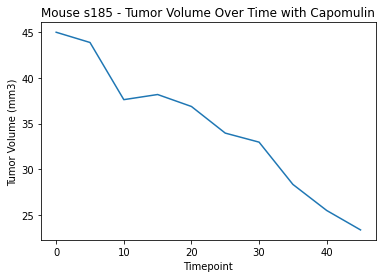

In [189]:
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"])
plt.title("Mouse s185 - Tumor Volume Over Time with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


In [196]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = capomulin.groupby("Mouse ID")
x_values = x_values["Weight (g)"].mean()
y_values = capomulin.groupby("Mouse ID")
y_values = y_values["Tumor Volume (mm3)"].mean()

x_values


Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
i557    24
i738    20
j119    23
j246    21
l509    21
l897    19
m601    17
m957    19
r157    25
r554    17
r944    25
s185    17
s710    23
t565    17
u364    17
v923    21
w150    23
w914    21
x401    15
y793    17
Name: Weight (g), dtype: int64

In [197]:
y_values


Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Avg. Tumor Volume (mm3)')

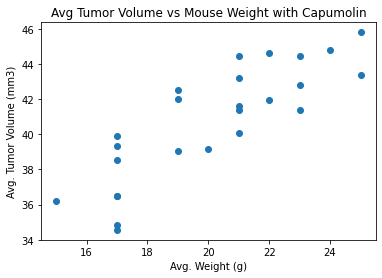

In [201]:
plt.scatter(x_values, y_values)
plt.title("Avg Tumor Volume vs Mouse Weight with Capumolin")
plt.xlabel("Avg. Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

## Correlation and Regression

In [175]:
# Calculate the correlation coefficient and linear regression model 
    # for mouse weight and average tumor volume for the Capomulin regimen


Text(18, 36, 'Correlation Coefficient: 0.84')

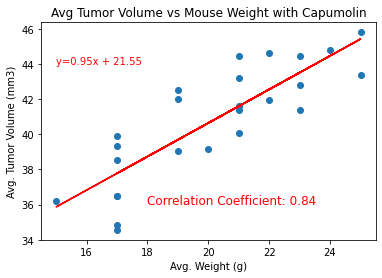

In [215]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regression = x_values * slope + intercept

regress_label = (f"y={round(slope,2)}x + {round(intercept,2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regression, "r-")
plt.title("Avg Tumor Volume vs Mouse Weight with Capumolin")
plt.xlabel("Avg. Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.annotate(regress_label, (15, 44), fontsize=10, color="red")
plt.annotate(f'Correlation Coefficient: {round(rvalue,2)}', (18,36), fontsize=12, color='red')